In [1]:
import sys
sys.path.insert(0, '../src')
from gauges import *

%config Completer.use_jedi = False #for auto complete code

In [2]:
#Conectando a la base de datos de niveles
conn = sqlite3.connect('../data/DZ/niveles.db')
#Cargando el archivo de shape file de cuencas
cuencas_shp=gpd.read_file('../data/shp/cuencas/UH.shp')
Estacion_convencional=Convencional(database=conn)
#Tabla del maestro de estaciones
Estacion_convencional.get_Maestro().head(10)

INVENTARIO_SINCERADO  DZ          NOMBRE_ESTACION    CODIGO     CATEGORIA  \
0                   NO   1                CABO_INGA  47E01126    AUTOMATICA   
1                   NO   1                 EL_TIGRE    200202  CONVENCIONAL   
2                   NO   1                 EL_TIGRE  4724A3F6    AUTOMATICA   
3                   NO   1            PUENTE_TUMBES  47E024BC    AUTOMATICA   
4                   NO  13  PUENTE_LOROCO_CALLACAME    210502  CONVENCIONAL   
5                   NO  13         PUENTE_ZAPATILLA    270503  CONVENCIONAL   
6                   SI  13                   ENAFER  47256412    AUTOMATICA   
7                   NO  13                   ENAFER    270000  CONVENCIONAL   
8                   NO  13         PUENTE_CARRETERA  47251282    AUTOMATICA   
9                   NO  13             PUENTE_RAMIS    210101  CONVENCIONAL   

  CLASIFICACION                TIPO    COMUNICACION FECHA_DE_INSTALACION  \
0           EHA         HIDROLÓGICA  SATELITAL GOES             05/12/14   
1           HLG         HIDROLÓGICA      VOZ Y DATA             01/08/64   
2          EHMA  HIDROMETEOROLÓGICA  SATELITAL GOES             11/08/01   
3           EHA         HIDROLÓGICA  SATELITAL GOES             22/10/14   
4           HLG         HIDROLÓGICA      VOZ Y DATA             09/07/94   
5           HLM         HIDROLÓGICA      VOZ Y DATA             01/01/76   
6           EHA         HIDROLÓGICA  SATELITAL GOES             SIN_DATO   
7           HLM         HIDROLÓGICA         NINGUNO             01/03/08   
8           EHA         HIDROLÓGICA  SATELITAL GOES             30/12/00   
9           HLG         HIDROLÓGICA      VOZ Y DATA             01/01/56   

  ESTADO_FUNCIONAMIENTO  ...    LATITUD   LONGITUD  Lat_Sexagesimal  \
0           FUNCIONANDO  ...  -3.978733 -80.399381     -3°58'43.44"   
1           FUNCIONANDO  ...  -3.768480 -80.456850      -3°46'6.53"   
2           FUNCIONANDO  ...  -3.768700 -80.456889      -3°46'7.32"   
3           FUNCIONANDO  ...  -3.570878 -80.460872     -3°34'15.16"   
4           FUNCIONANDO  ... -16.570650 -69.322780    -16°34'14.34"   
5           FUNCIONANDO  ... -16.138603 -69.578730     -16°8'18.97"   
6           FUNCIONANDO  ... -15.836493 -70.016030    -15°50'11.37"   
7            PARALIZADA  ... -15.836490 -70.015898    -15°50'11.36"   
8           FUNCIONANDO  ... -15.255309 -69.873786    -15°15'19.11"   
9           FUNCIONANDO  ... -15.255309 -69.873786    -15°15'19.11"   

  Lot_Sexagesimal ALTITUD  DEPARTAMENTO  PROVINCIA     DISTRITO     COD_Clima  \
0   -80°23'57.77"   160.0        TUMBES     TUMBES  SAN JACINTO  C (i , p) A'   
1   -80°27'24.66"    36.0        TUMBES     TUMBES  SAN JACINTO  D (i , p) A'   
2    -80°27'24.8"    37.0        TUMBES     TUMBES  SAN JACINTO  D (i , p) A'   
3   -80°27'39.14"     8.0        TUMBES     TUMBES       TUMBES  D (i , p) A'   
4   -69°19'22.01"  3862.0          PUNO   CHUCUITO      KELLUYO  C (o , i) C'   
5   -69°34'43.43"  3846.0          PUNO  EL COLLAO        ILAVE  C (o , i) C'   
6    -70°0'57.71"  3812.0          PUNO       PUNO         PUNO  B (o , i) C'   
7    -70°0'57.23"  3823.0          PUNO       PUNO         PUNO  B (o , i) C'   
8   -69°52'25.63"  3825.0          PUNO   HUANCANE       TARACO  C (o , i) C'   
9   -69°52'25.63"  3825.0          PUNO   HUANCANE       TARACO  C (o , i) C'   

              Cuenca  
0      Cuenca Tumbes  
1      Cuenca Tumbes  
2      Cuenca Tumbes  
3      Cuenca Tumbes  
4  Cuenca Callaccame  
5   Intercuenca 0157  
6   Intercuenca 0173  
7   Intercuenca 0173  
8  Intercuenca Ramis  
9  Intercuenca Ramis  

[10 rows x 21 columns]

# Estacione ubicadas en cuencas especificas

In [3]:
DZ4_cuenca_estaciones,DZ4_cuencas=Estacion_convencional.estaciones_por_cuenca_dz(4)
DZ9_cuenca_estaciones,DZ9_cuencas=Estacion_convencional.estaciones_por_cuenca_dz(9)
maestro =Estacion_convencional.get_Maestro()
mapa=folium.Map(location=[maestro.LATITUD.mean(),maestro.LONGITUD.mean()],zoom_start=6)
for cuenca in DZ4_cuenca_estaciones:
    filtro=maestro[maestro['CODIGO'].isin(DZ4_cuenca_estaciones[cuenca])]
    gauge_stations(filtro,cuencas_shp,mapa,cuenca)

for cuenca in DZ9_cuenca_estaciones:
    filtro=maestro[maestro['CODIGO'].isin(DZ9_cuenca_estaciones[cuenca])]
    gauge_stations(filtro,cuencas_shp,mapa,cuenca)
mapa

# Estaciones de la DZ 4

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


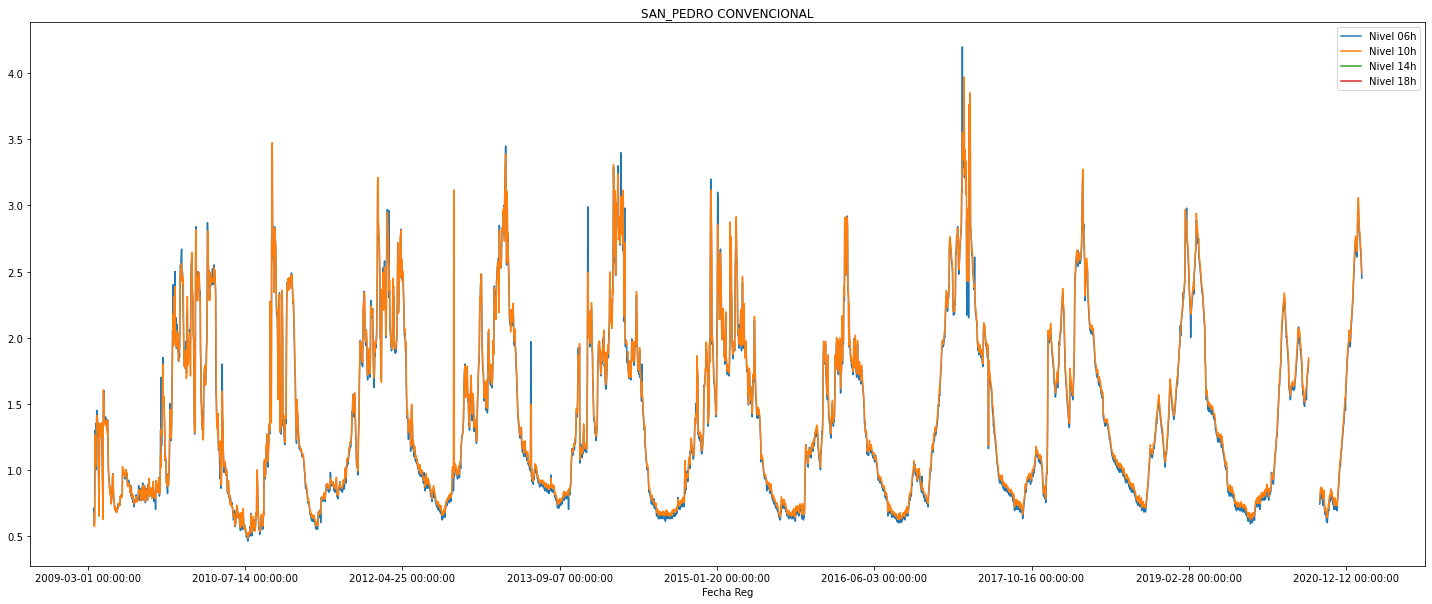

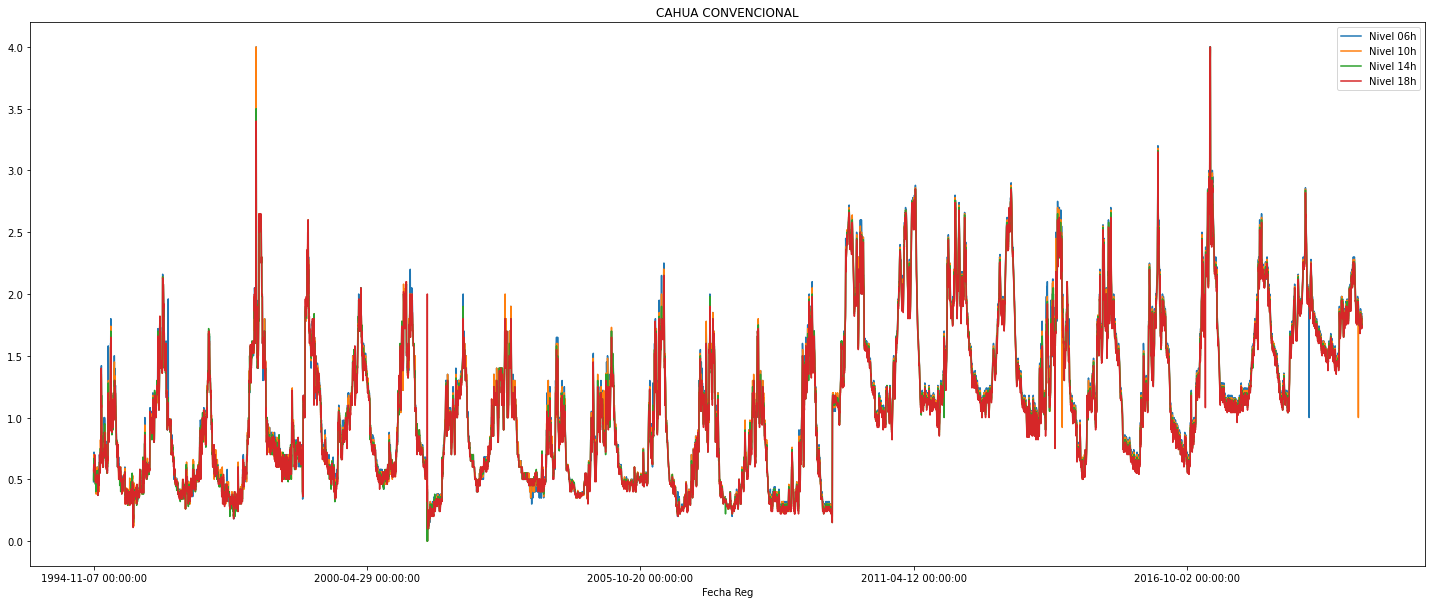

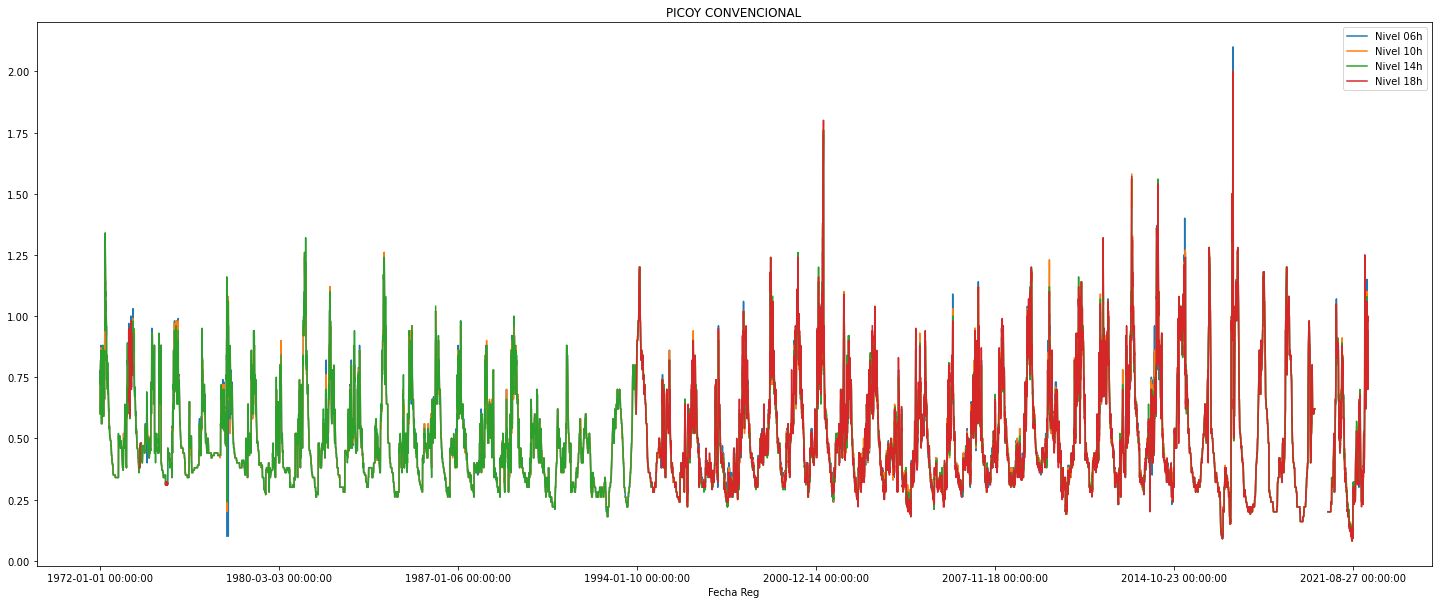

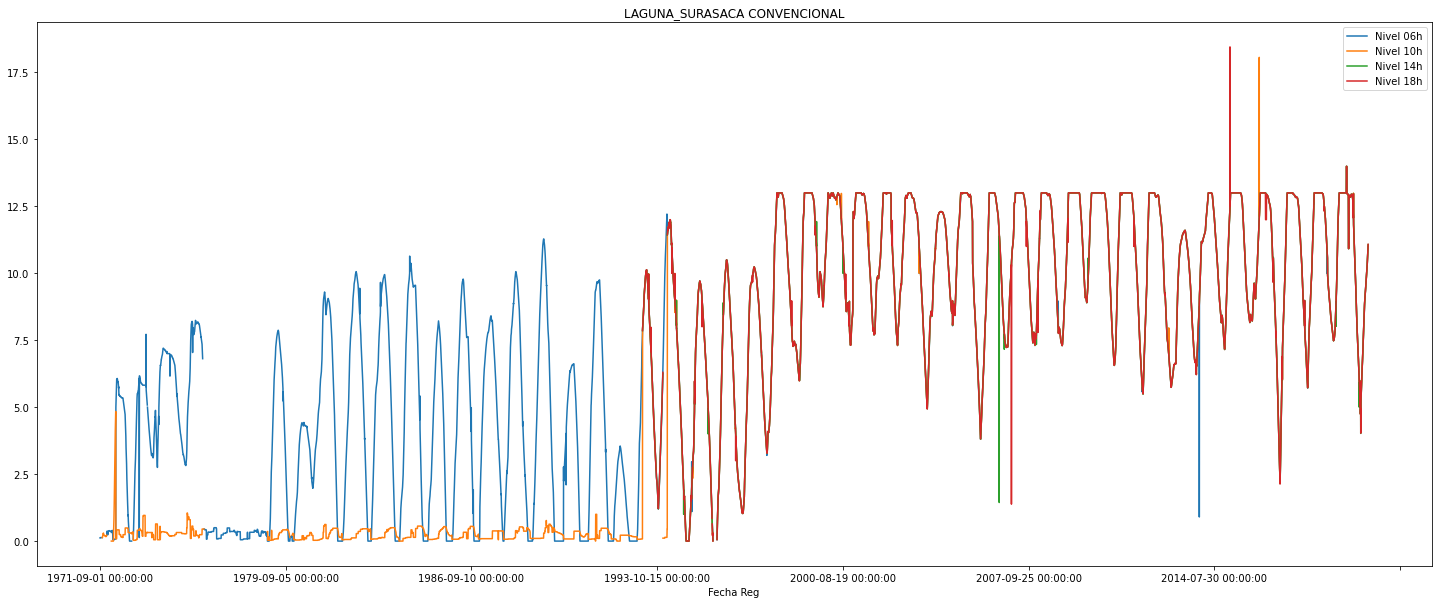

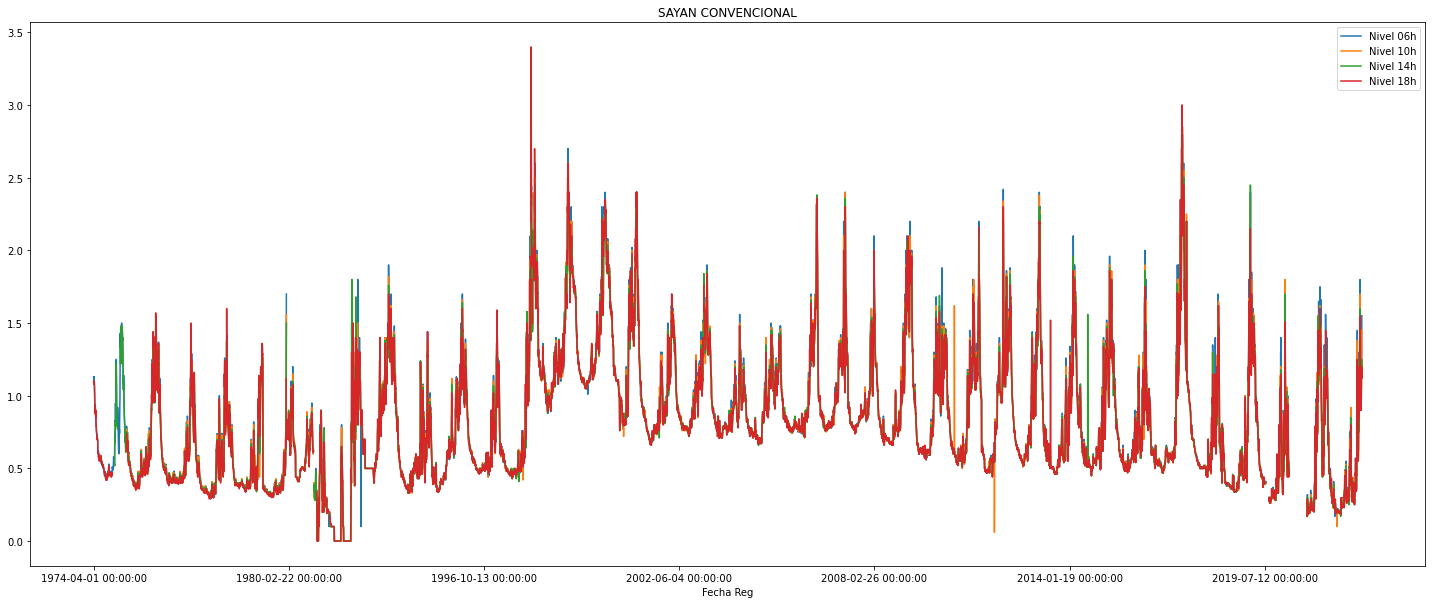

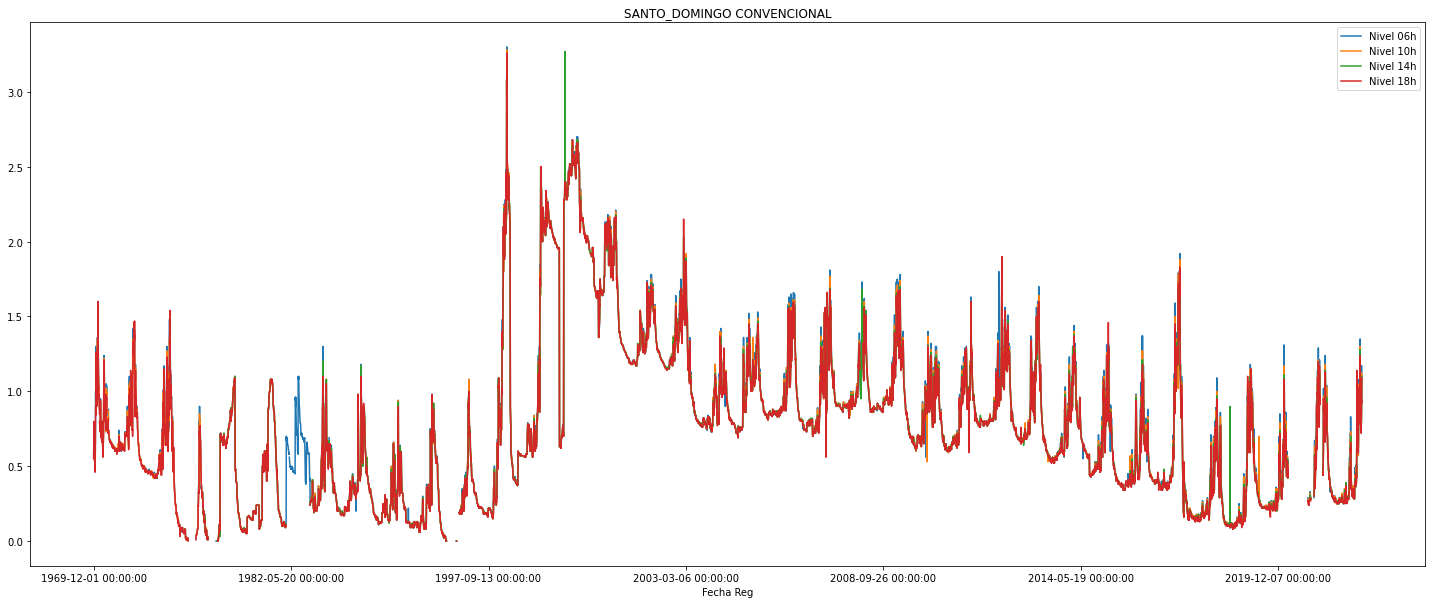

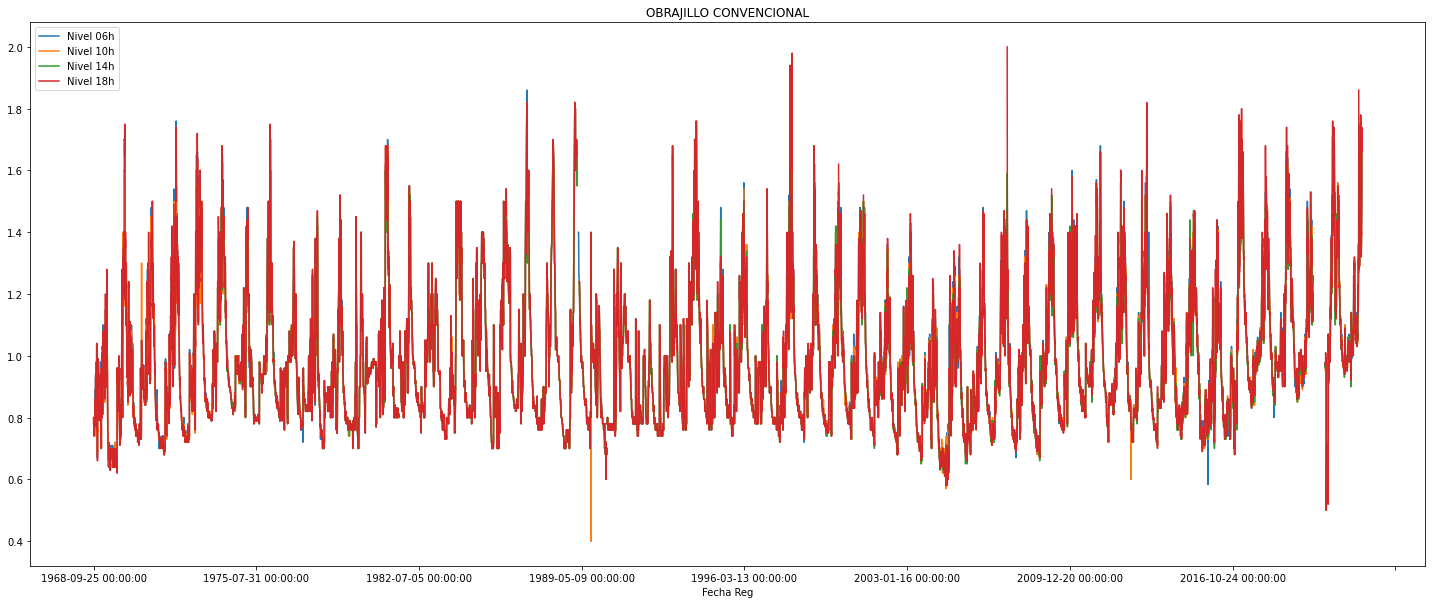

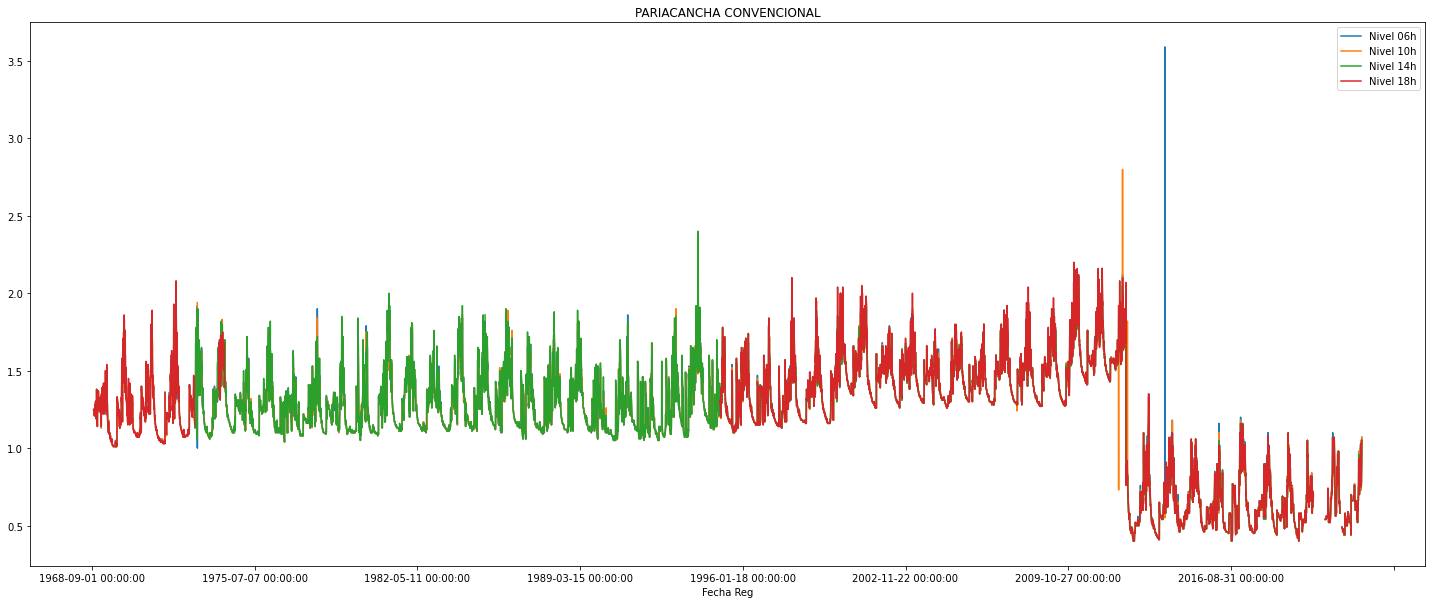

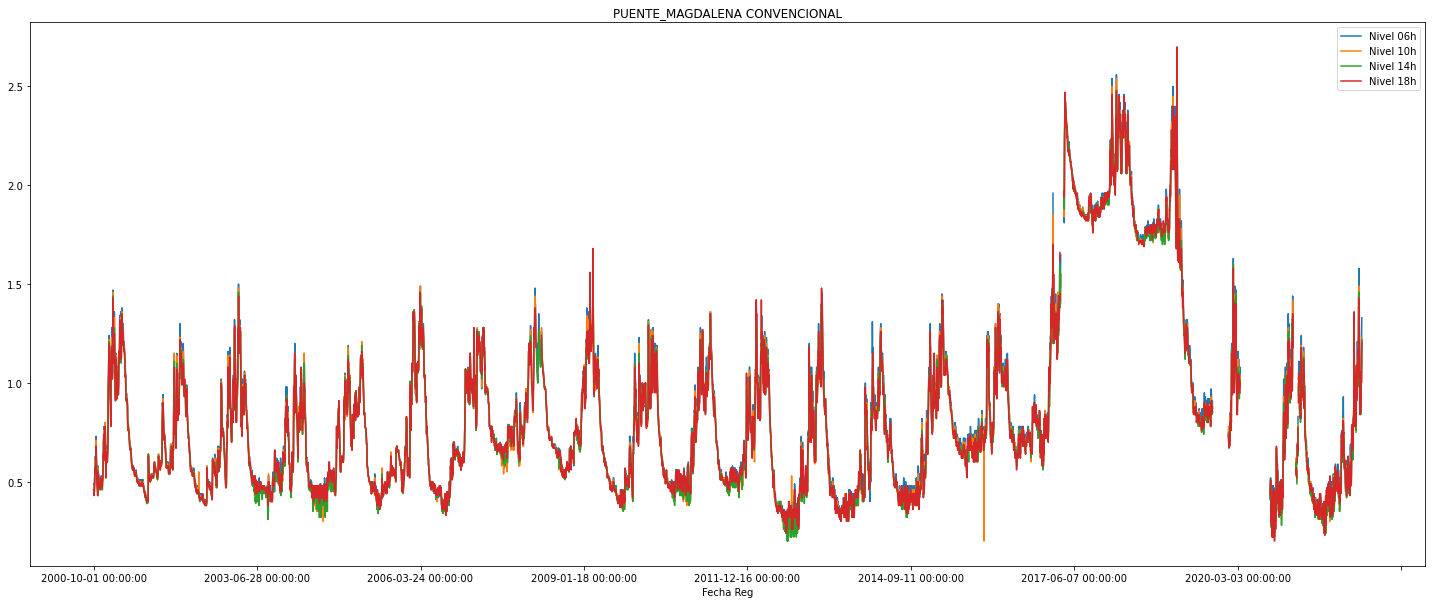

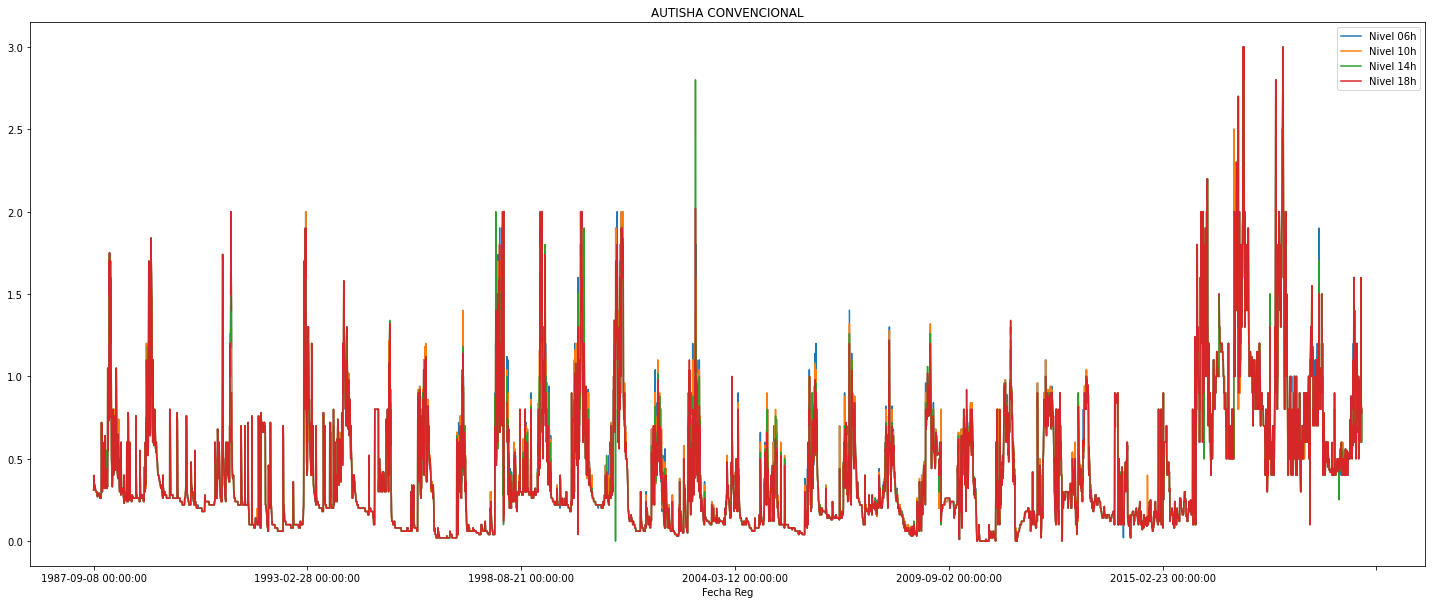

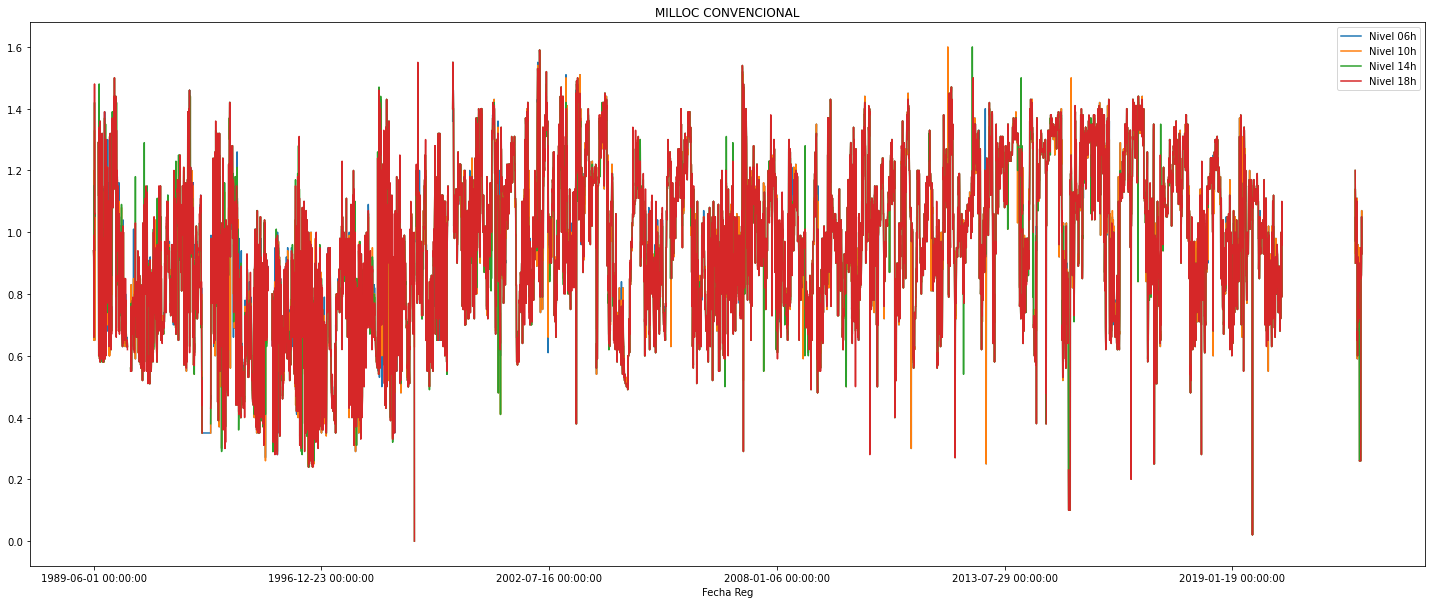

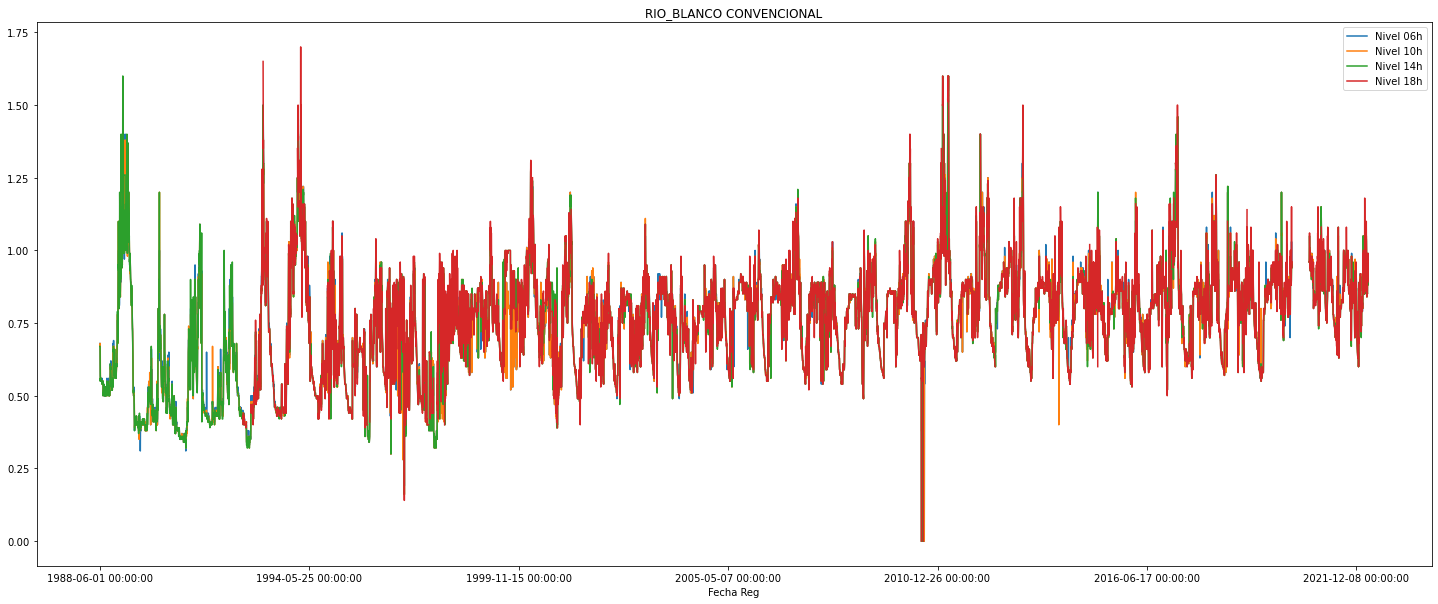

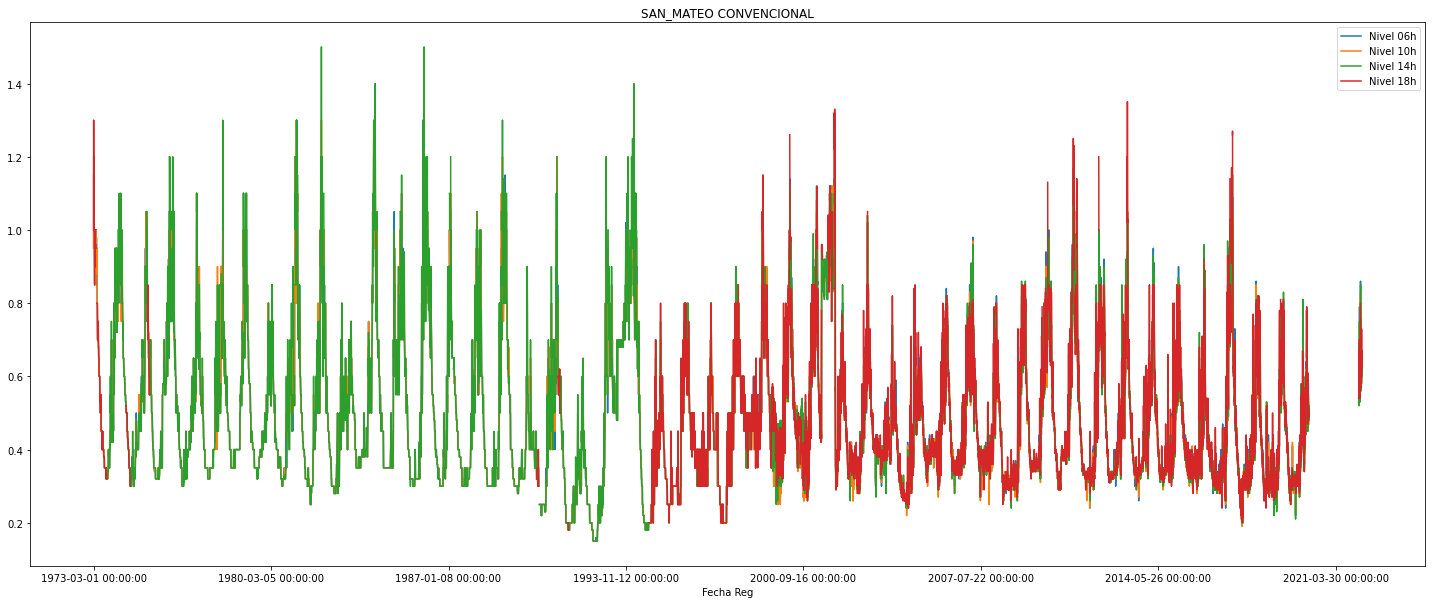

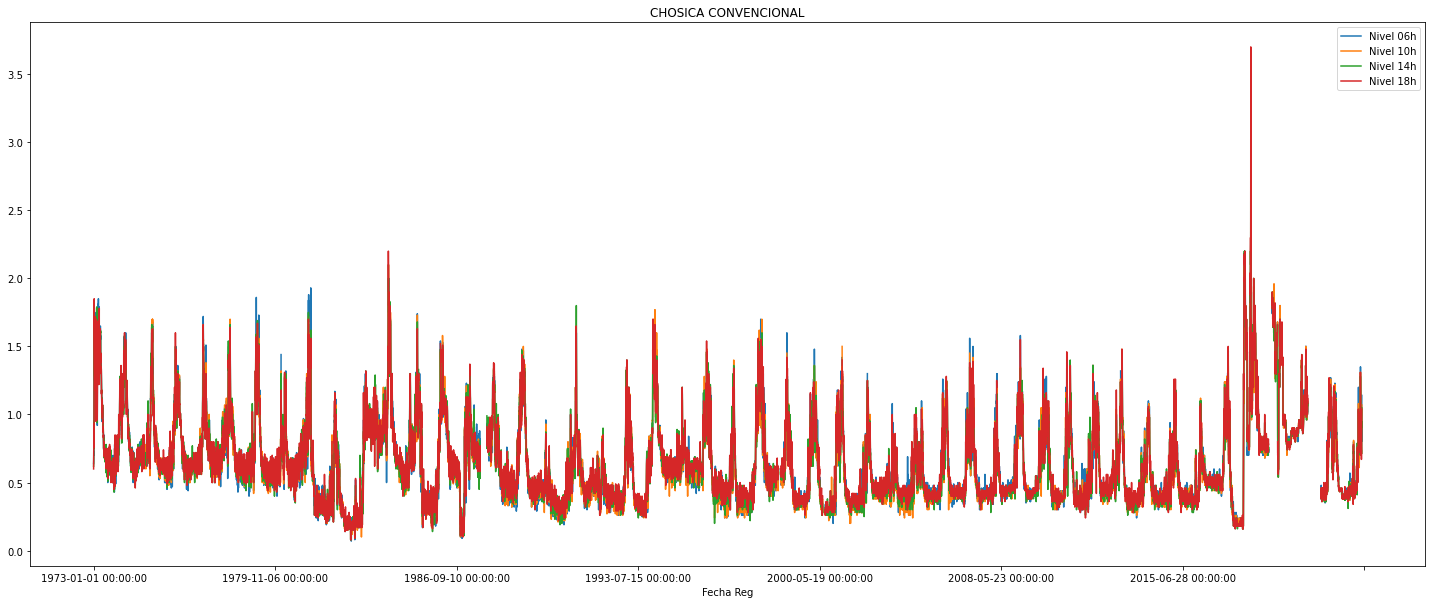

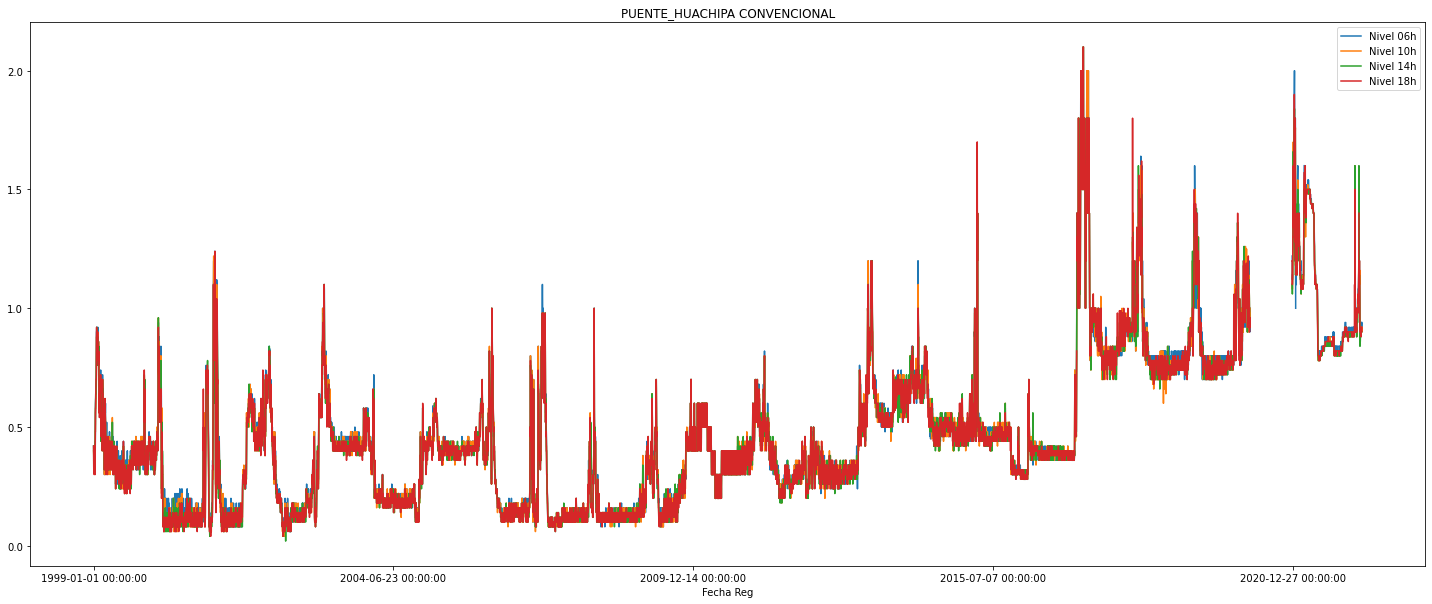

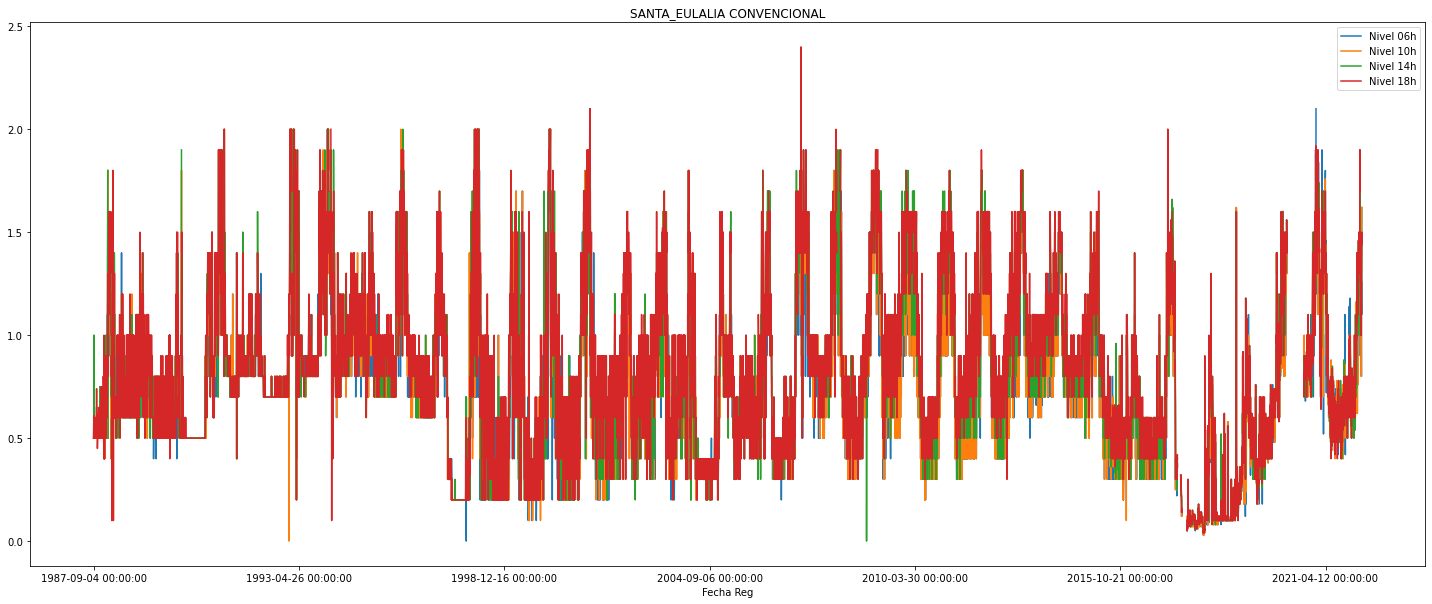

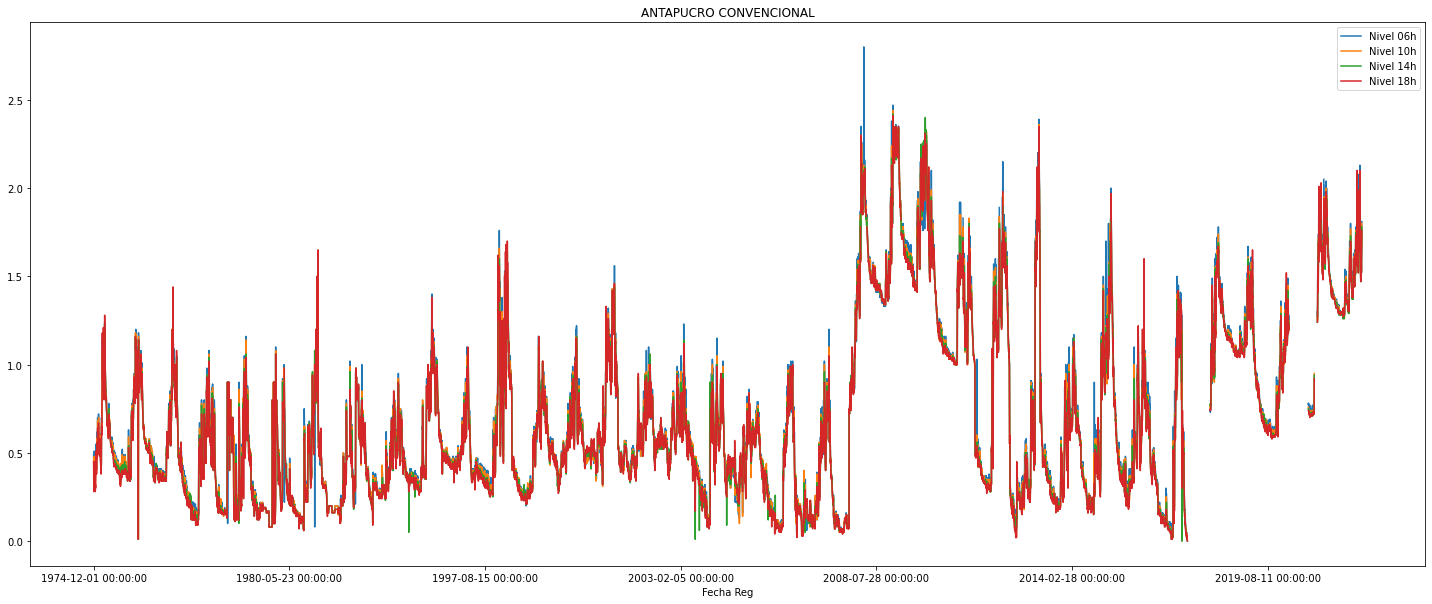

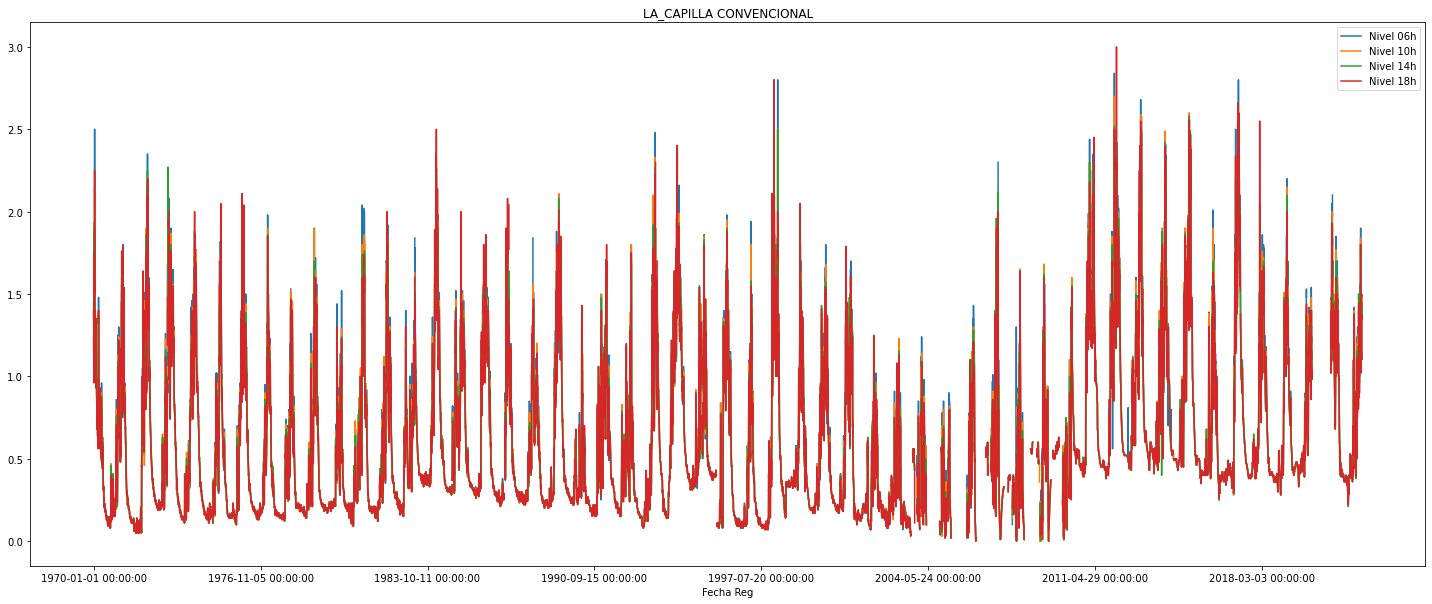

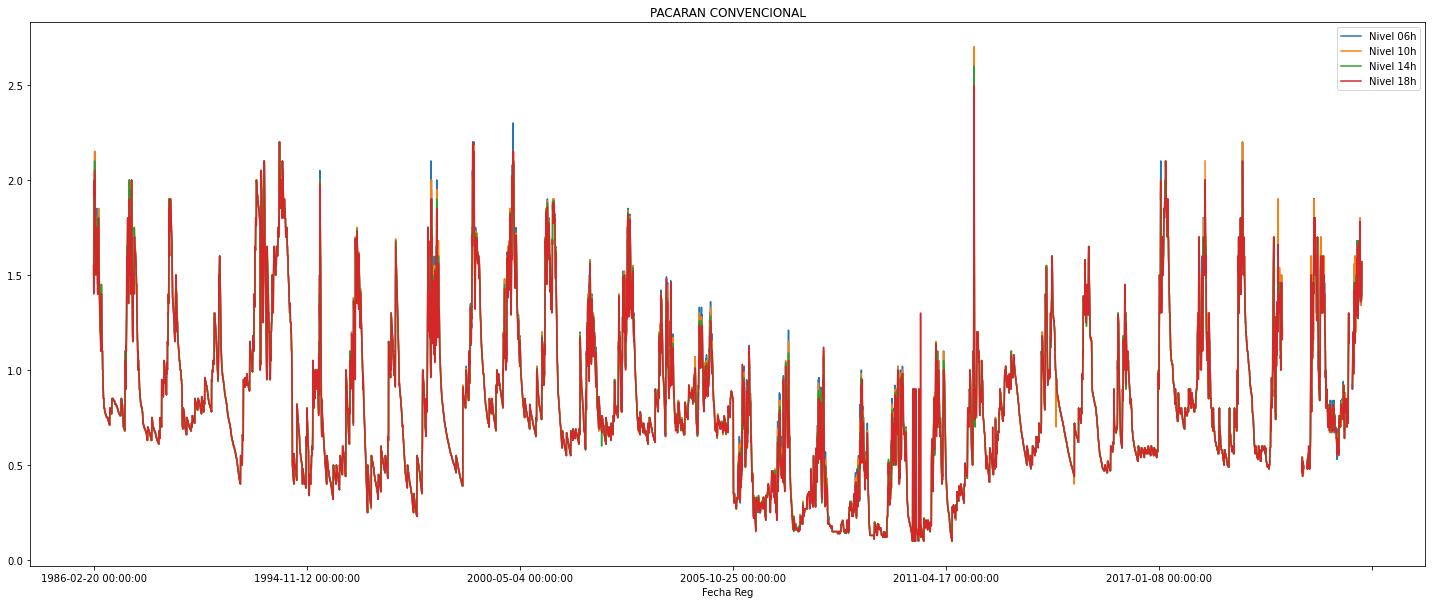

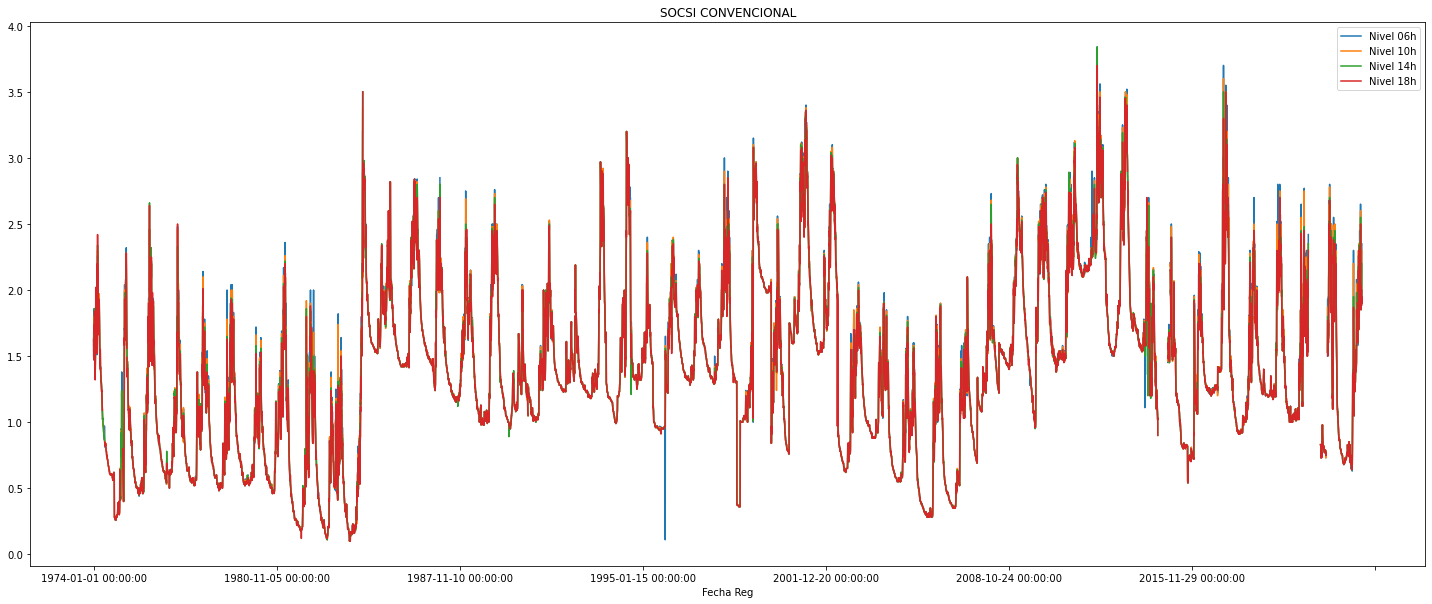

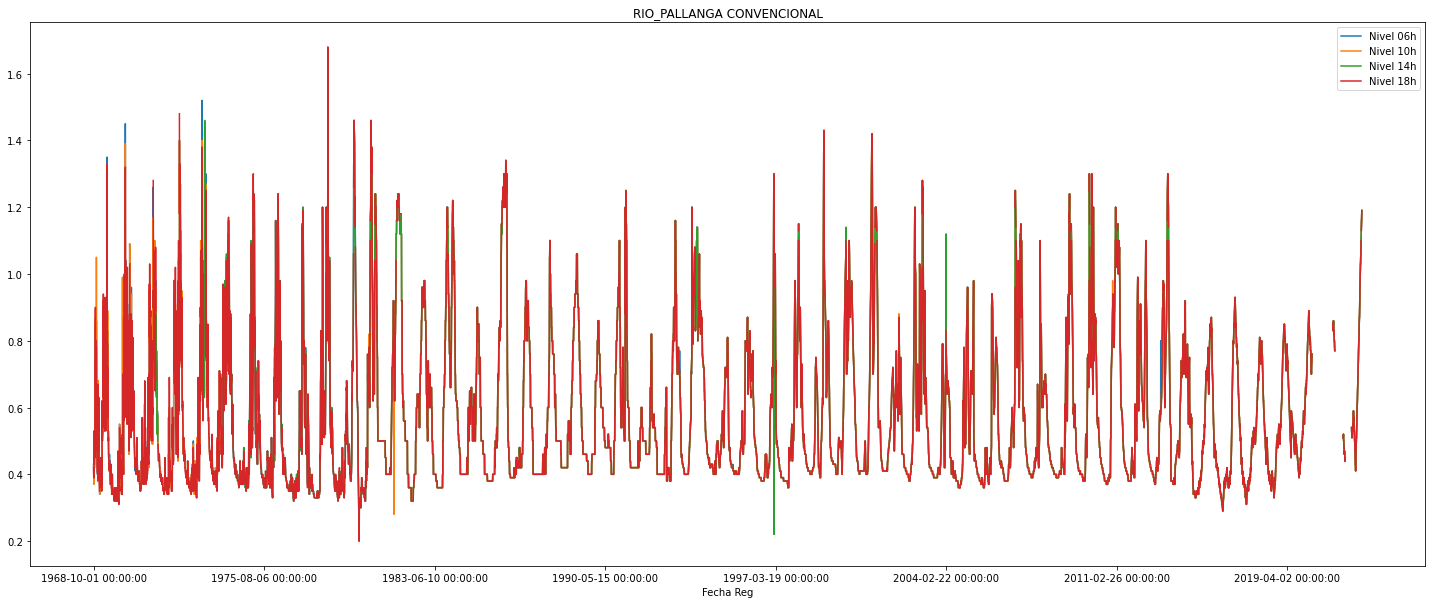

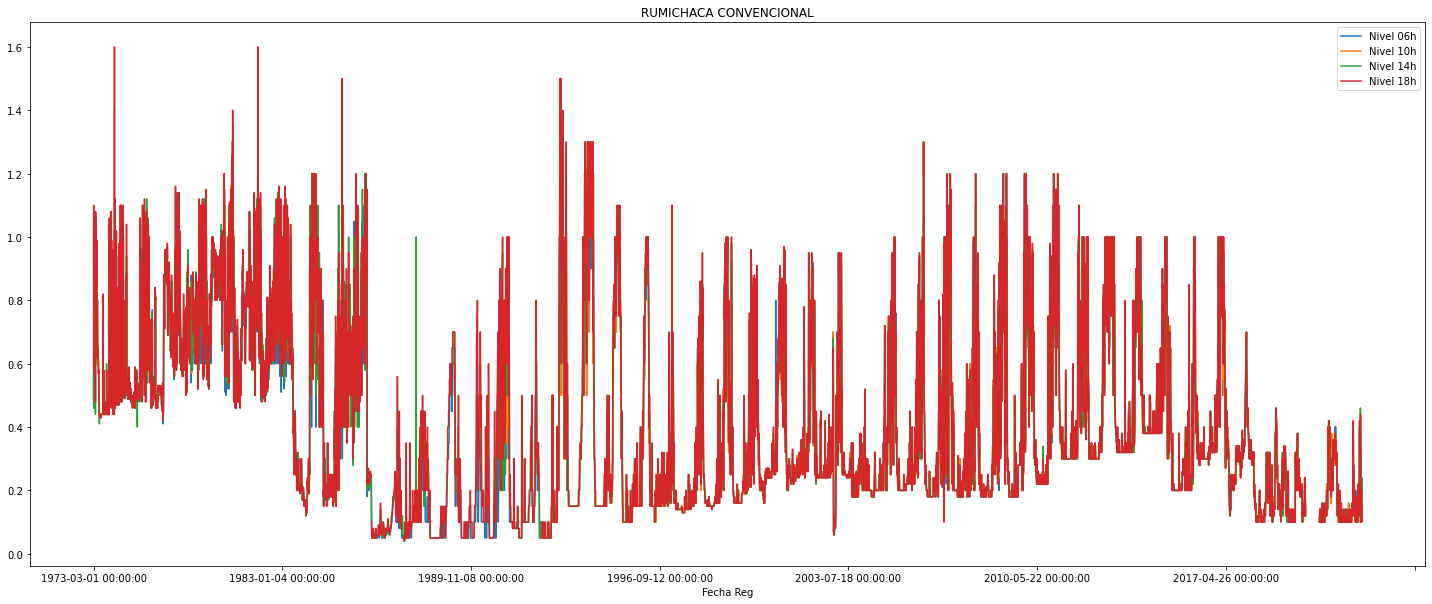

In [4]:
#Seleccionando las estaciones de la DZ 4 y graficando sus niveles
DZ4=Estacion_convencional.estaciones_por_dz(4)
log_reports_dz4=Estacion_convencional.get_log_report()
Estacion_convencional.plot_dz_niveles()

In [5]:
Estadisticos=pd.concat(Estacion_convencional.max_historic_and_previous())
Estadisticos.to_excel('../data/horizontes/Umbrales_CONV_DZ4.xlsx',index=False)
Estadisticos.head(20)

Estaciones  Año de Inicio  Año de Fin  \
Nivel 06h        SAN_PEDRO CONVENCIONAL Nivel 06h           2009        2021   
Nivel 10h        SAN_PEDRO CONVENCIONAL Nivel 10h           2009        2021   
Nivel 14h        SAN_PEDRO CONVENCIONAL Nivel 14h           2009        2021   
Nivel 18h        SAN_PEDRO CONVENCIONAL Nivel 18h           2009        2021   
Nivel 06h            CAHUA CONVENCIONAL Nivel 06h           1994        2020   
Nivel 10h            CAHUA CONVENCIONAL Nivel 10h           1994        2020   
Nivel 14h            CAHUA CONVENCIONAL Nivel 14h           1994        2020   
Nivel 18h            CAHUA CONVENCIONAL Nivel 18h           1994        2020   
Nivel 06h            PICOY CONVENCIONAL Nivel 06h           1972        2022   
Nivel 10h            PICOY CONVENCIONAL Nivel 10h           1972        2022   
Nivel 14h            PICOY CONVENCIONAL Nivel 14h           1972        2022   
Nivel 18h            PICOY CONVENCIONAL Nivel 18h           1972        2022   
Nivel 06h  LAGUNA_SURASACA CONVENCIONAL Nivel 06h           1971        2020   
Nivel 10h  LAGUNA_SURASACA CONVENCIONAL Nivel 10h           1971        2020   
Nivel 14h  LAGUNA_SURASACA CONVENCIONAL Nivel 14h           1971        2020   
Nivel 18h  LAGUNA_SURASACA CONVENCIONAL Nivel 18h           1971        2020   
Nivel 06h            SAYAN CONVENCIONAL Nivel 06h           1974        2022   
Nivel 10h            SAYAN CONVENCIONAL Nivel 10h           1974        2022   
Nivel 14h            SAYAN CONVENCIONAL Nivel 14h           1974        2022   
Nivel 18h            SAYAN CONVENCIONAL Nivel 18h           1974        2022   

           max año previo  max historico  max año previo estiaje  \
Nivel 06h            2.19         4.2000                  0.8400   
Nivel 10h            2.22         3.9725                  0.8675   
Nivel 14h             NaN            NaN                     NaN   
Nivel 18h             NaN            NaN                     NaN   
Nivel 06h            2.86         4.0000                  1.7000   
Nivel 10h            2.85         4.0000                  1.6800   
Nivel 14h            2.84         4.0000                  1.6600   
Nivel 18h            2.82         4.0000                  1.6500   
Nivel 06h            1.07         2.1000                  0.3000   
Nivel 10h            1.05         2.0000                  0.3200   
Nivel 14h            1.05         2.0000                  0.3200   
Nivel 18h            1.05         2.0000                  0.3000   
Nivel 06h           13.99        13.9900                 13.9900   
Nivel 10h           13.99        18.0600                 13.9900   
Nivel 14h           13.99        13.9900                 13.9900   
Nivel 18h           13.99        18.4500                 13.9900   
Nivel 06h            1.75         2.9000                  0.4100   
Nivel 10h            1.62         3.3000                  0.3900   
Nivel 14h            1.55         3.0000                  0.3900   
Nivel 18h            1.60         3.4000                  0.3600   

           max año previo avenida  min año previo estiaje  \
Nivel 06h                   2.160                    0.73   
Nivel 10h                   2.205                    0.77   
Nivel 14h                     NaN                     NaN   
Nivel 18h                     NaN                     NaN   
Nivel 06h                   2.860                    1.40   
Nivel 10h                   2.850                    1.38   
Nivel 14h                   2.840                    1.36   
Nivel 18h                   2.820                    1.35   
Nivel 06h                   1.070                    0.09   
Nivel 10h                   1.050                    0.08   
Nivel 14h                   1.050                    0.08   
Nivel 18h                   1.050                    0.08   
Nivel 06h                  13.000                   10.71   
Nivel 10h                  13.000                   10.70   
Nivel 14h     

In [6]:
log_reports_dz4['OBRAJILLO CONVENCIONAL']

Codigo   Estacion            Fecha Reg   ano  mes  dia  Nivel 06h  \
1579   202802  OBRAJILLO  1973-01-21 00:00:00  1973  ENE   21       1.60   
1625   202802  OBRAJILLO  1973-03-08 00:00:00  1973  MAR    8       1.54   
7431   202802  OBRAJILLO  1989-03-01 00:00:00  1989  MAR    1       1.65   
7432   202802  OBRAJILLO  1989-03-02 00:00:00  1989  MAR    2       1.65   
7433   202802  OBRAJILLO  1989-03-03 00:00:00  1989  MAR    3       1.65   
...       ...        ...                  ...   ...  ...  ...        ...   
19436  202802  OBRAJILLO  2022-02-11 00:00:00  2022  FEB   11       1.32   
19443  202802  OBRAJILLO  2022-02-18 00:00:00  2022  FEB   18       1.40   
19450  202802  OBRAJILLO  2022-02-25 00:00:00  2022  FEB   25       1.36   
19456  202802  OBRAJILLO  2022-03-03 00:00:00  2022  MAR    3       1.46   
19459  202802  OBRAJILLO  2022-03-06 00:00:00  2022  MAR    6       1.43   

       Nivel 10h  Nivel 14h  Nivel 18h  Nivel Med Caudal  
1579        1.45        NaN       1.40       1.48   None  
1625        1.45        NaN       1.40       1.46   None  
7431         NaN        NaN        NaN       1.65   None  
7432         NaN        NaN        NaN       1.65   None  
7433         NaN        NaN        NaN       1.65   None  
...          ...        ...        ...        ...    ...  
19436       1.33       1.35       1.55       1.39   None  
19443       1.42       1.44       1.50       1.44   None  
19450       1.34       1.33       1.55       1.40   None  
19456       1.46       1.46       1.56       1.48   None  
19459       1.43       1.42       1.48       1.44   None  

[155 rows x 12 columns]

# Estaciones de la DZ 9

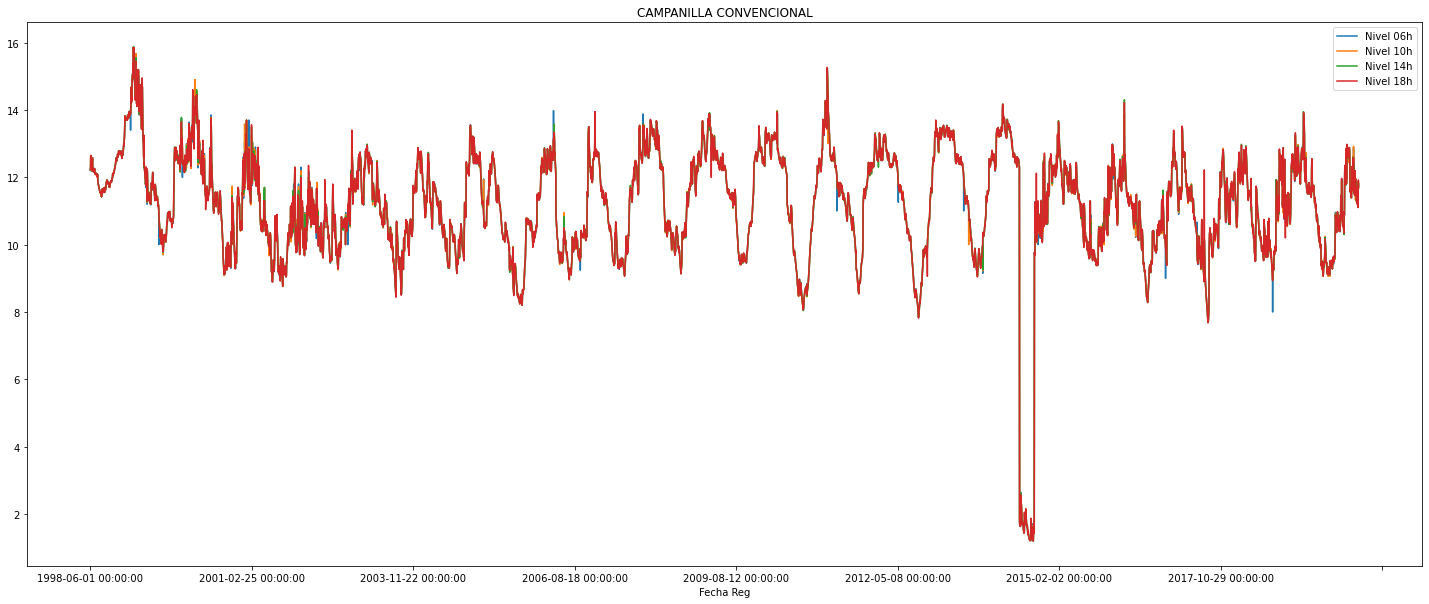

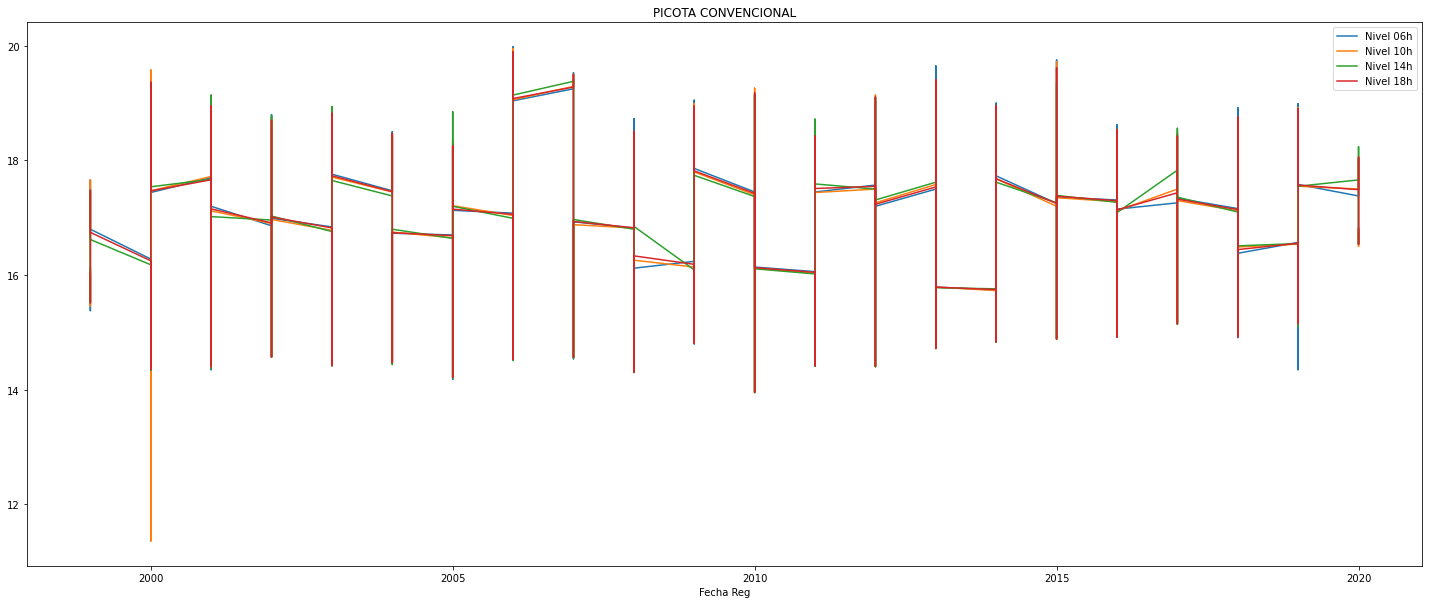

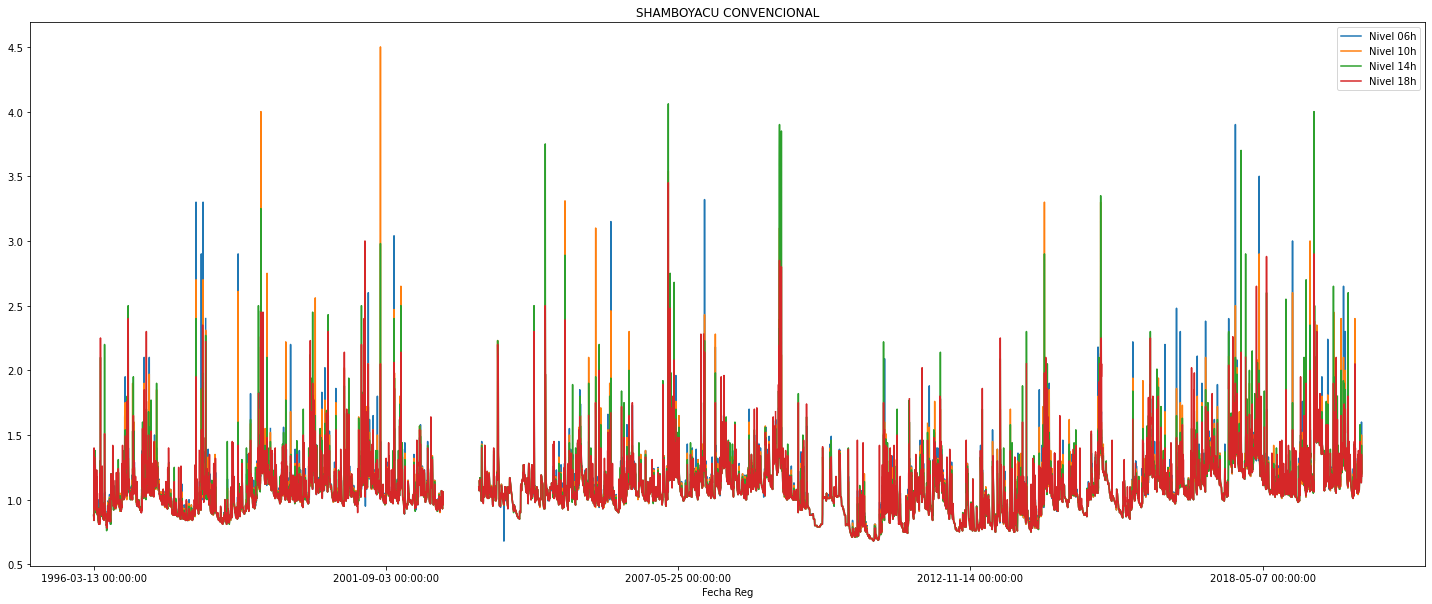

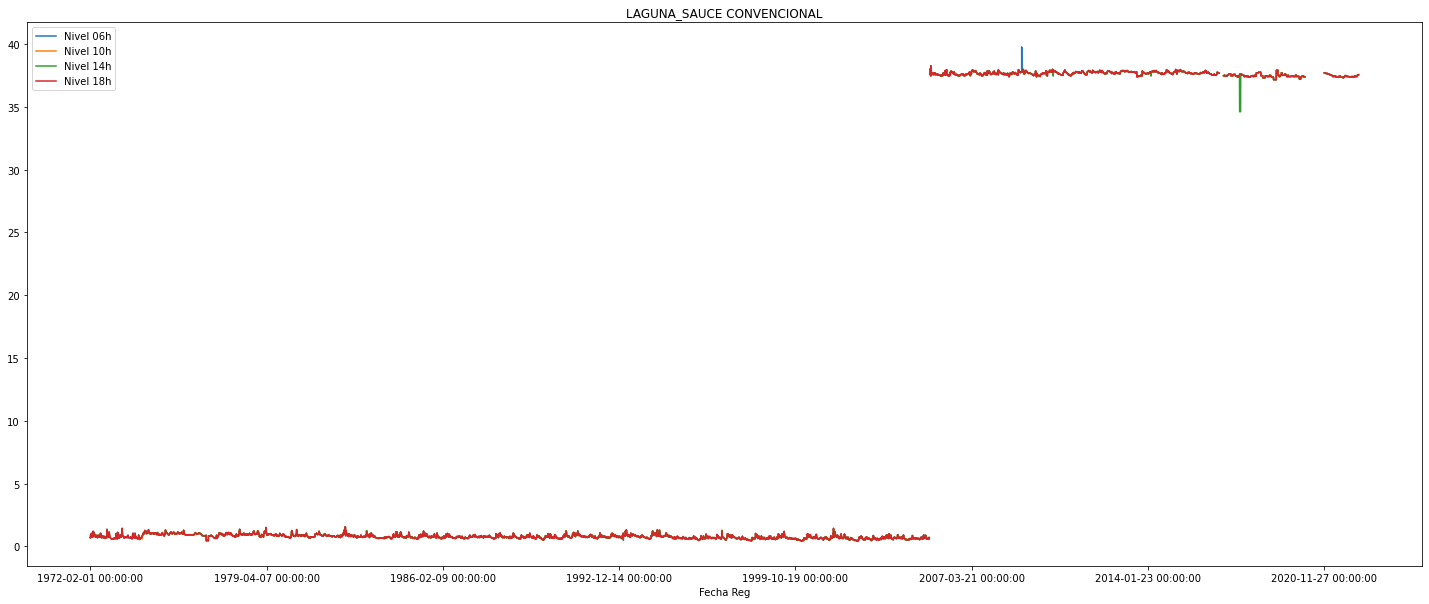

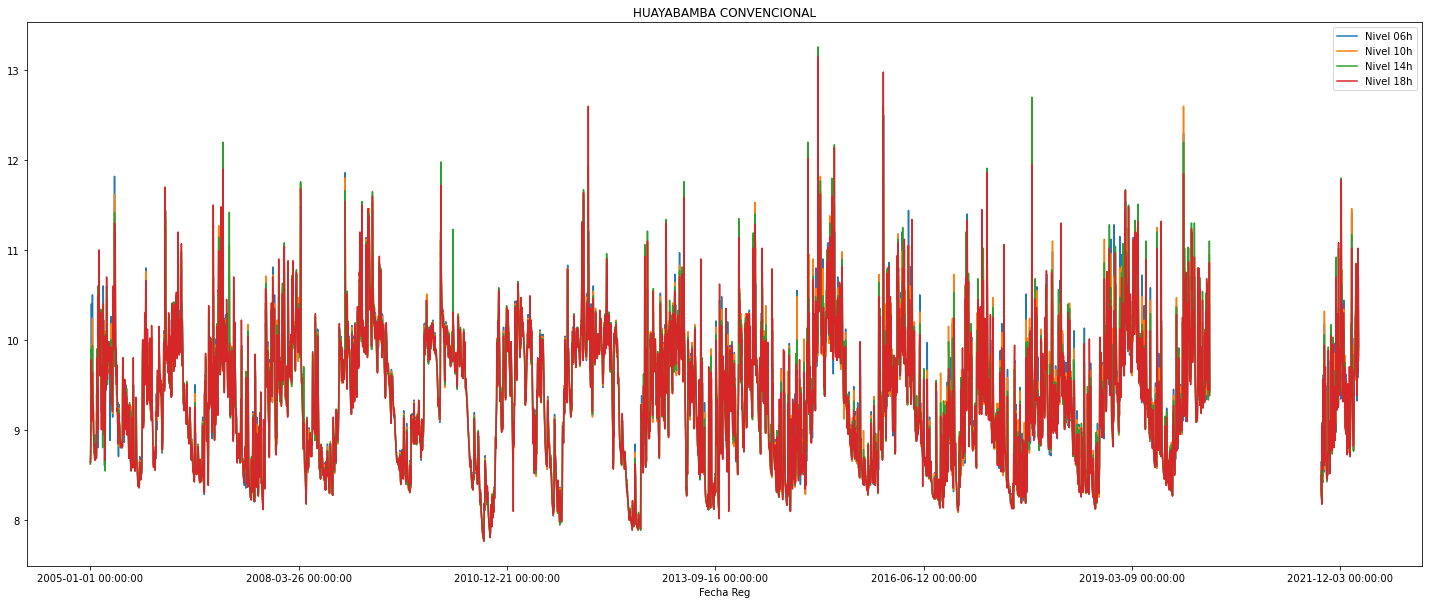

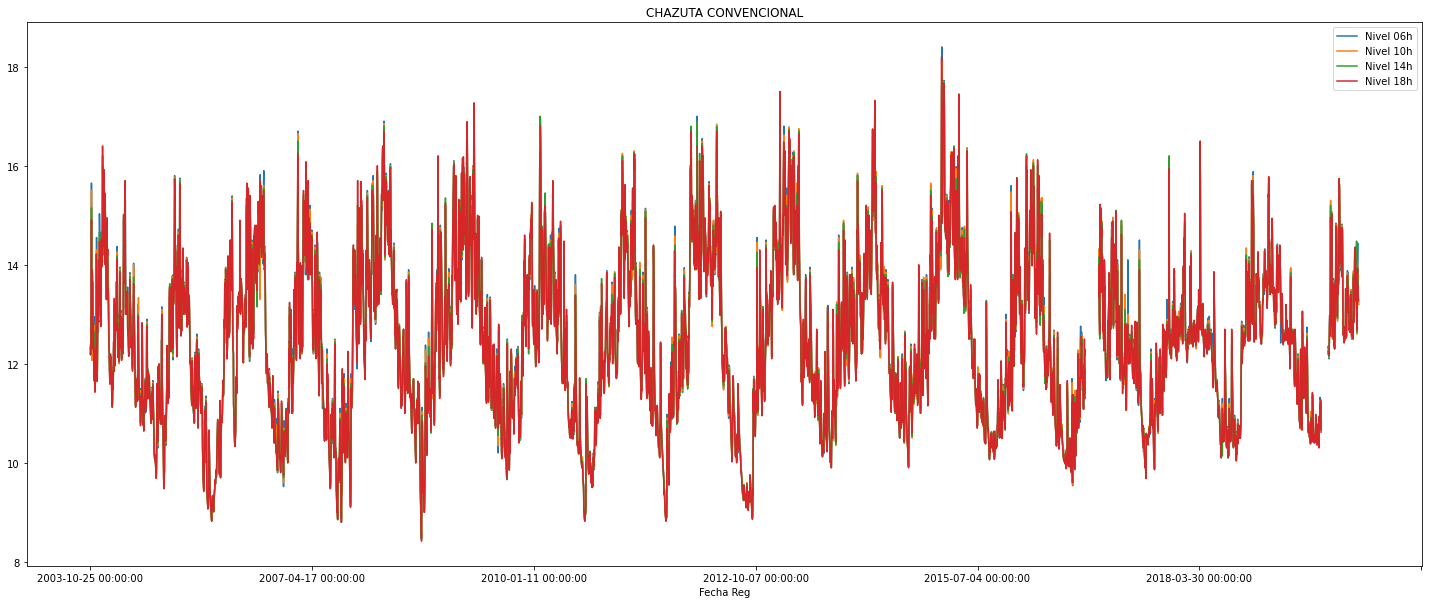

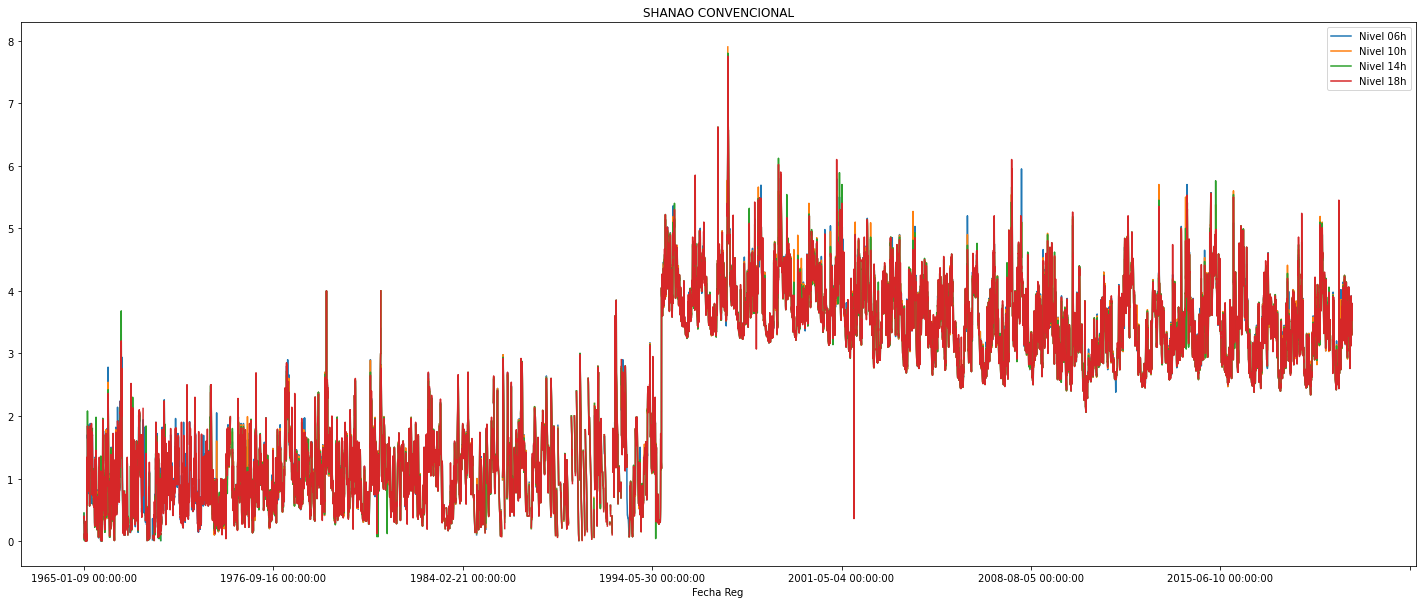

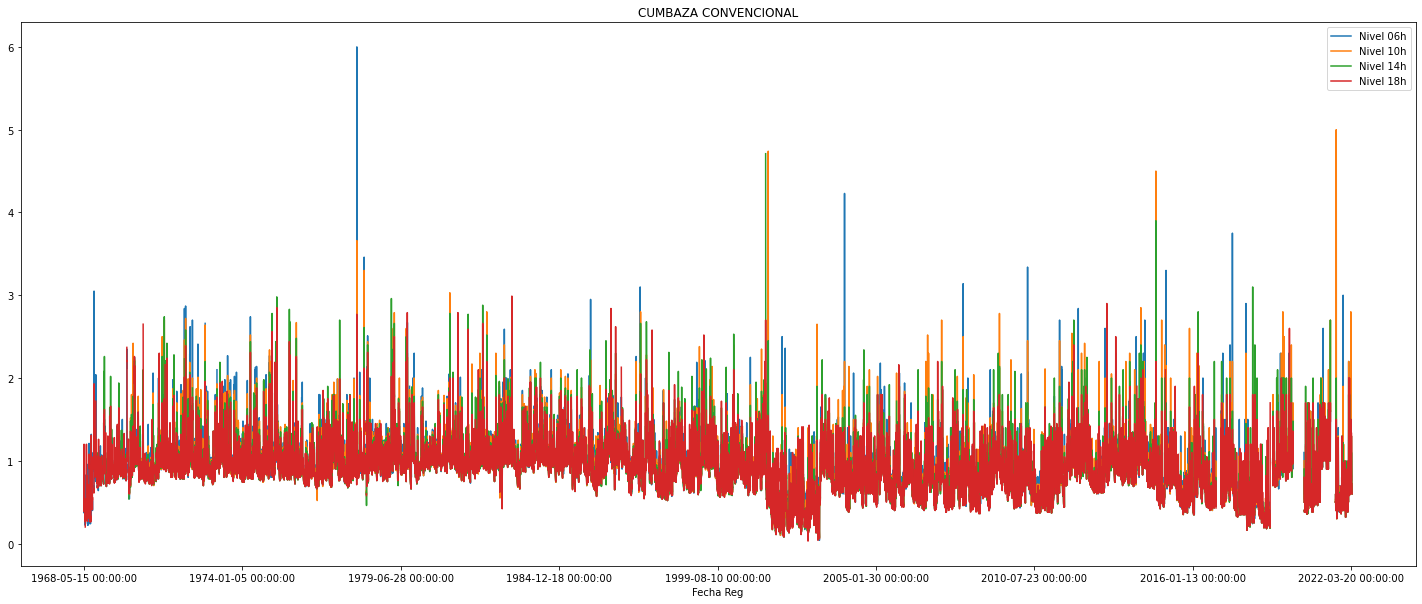

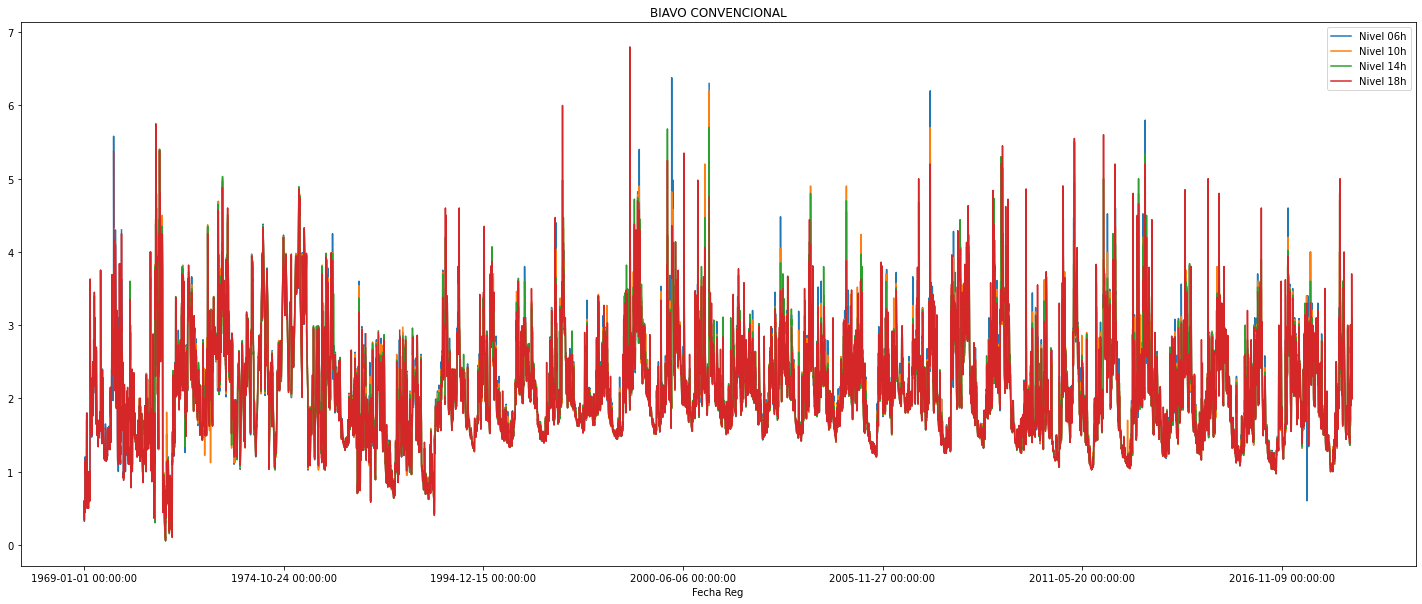

In [7]:
DZ9=Estacion_convencional.estaciones_por_dz(9)
Estacion_convencional.plot_dz_niveles()

In [8]:
Estadisticos=pd.concat(Estacion_convencional.max_historic_and_previous())
Estadisticos.to_excel('../data/horizontes/Umbrales_CONV_DZ9.xlsx',index=False)
Estadisticos.head(20)

PICOTA CONVENCIONALtiene menos de dos años de registro [1970]


Estaciones  Año de Inicio  Año de Fin  \
Nivel 06h    CAMPANILLA CONVENCIONAL Nivel 06h           1998        2020   
Nivel 10h    CAMPANILLA CONVENCIONAL Nivel 10h           1998        2020   
Nivel 14h    CAMPANILLA CONVENCIONAL Nivel 14h           1998        2020   
Nivel 18h    CAMPANILLA CONVENCIONAL Nivel 18h           1998        2020   
Nivel 06h    SHAMBOYACU CONVENCIONAL Nivel 06h           1996        2020   
Nivel 10h    SHAMBOYACU CONVENCIONAL Nivel 10h           1996        2020   
Nivel 14h    SHAMBOYACU CONVENCIONAL Nivel 14h           1996        2020   
Nivel 18h    SHAMBOYACU CONVENCIONAL Nivel 18h           1996        2020   
Nivel 06h  LAGUNA_SAUCE CONVENCIONAL Nivel 06h           1972        2022   
Nivel 10h  LAGUNA_SAUCE CONVENCIONAL Nivel 10h           1972        2022   
Nivel 14h  LAGUNA_SAUCE CONVENCIONAL Nivel 14h           1972        2022   
Nivel 18h  LAGUNA_SAUCE CONVENCIONAL Nivel 18h           1972        2022   
Nivel 06h    HUAYABAMBA CONVENCIONAL Nivel 06h           2005        2022   
Nivel 10h    HUAYABAMBA CONVENCIONAL Nivel 10h           2005        2022   
Nivel 14h    HUAYABAMBA CONVENCIONAL Nivel 14h           2005        2022   
Nivel 18h    HUAYABAMBA CONVENCIONAL Nivel 18h           2005        2022   
Nivel 06h       CHAZUTA CONVENCIONAL Nivel 06h           2003        2020   
Nivel 10h       CHAZUTA CONVENCIONAL Nivel 10h           2003        2020   
Nivel 14h       CHAZUTA CONVENCIONAL Nivel 14h           2003        2020   
Nivel 18h       CHAZUTA CONVENCIONAL Nivel 18h           2003        2020   

           max año previo  max historico  max año previo estiaje  \
Nivel 06h           13.88          15.82                   11.40   
Nivel 10h           13.85          15.87                   11.40   
Nivel 14h           13.95          15.87                   11.40   
Nivel 18h           13.92          15.85                   11.40   
Nivel 06h            2.65           3.90                    2.24   
Nivel 10h            3.00           4.50                    2.45   
Nivel 14h            4.00           4.06                    2.65   
Nivel 18h            2.90           3.45                    2.10   
Nivel 06h           37.65          39.76                   37.47   
Nivel 10h           37.65          38.26                   37.47   
Nivel 14h           37.65          38.23                   37.47   
Nivel 18h           37.65          38.25                   37.47   
Nivel 06h           11.30          12.50                   10.18   
Nivel 10h           11.72          12.90                   10.32   
Nivel 14h           11.80          13.26                   10.06   
Nivel 18h           11.78          13.15                    9.94   
Nivel 06h           15.62          18.40                   12.74   
Nivel 10h           15.74          18.11                   12.90   
Nivel 14h           15.76          17.75                   13.06   
Nivel 18h           15.78          18.20                   13.06   

           max año previo avenida  min año previo estiaje  \
Nivel 06h                   13.88                    9.08   
Nivel 10h                   13.85                    9.06   
Nivel 14h                   13.95                    9.08   
Nivel 18h                   13.92                    9.06   
Nivel 06h                    1.76                    1.06   
Nivel 10h                    3.00                    1.06   
Nivel 14h                    4.00                    1.05   
Nivel 18h                    2.90                    1.05   
Nivel 06h                   37.65                   37.30   
Nivel 10h                   37.65                   37.30   
Nivel 14h                   37.65                   37.30   
Nivel 18h                   37.65                   37.30   
Nivel 06h                     NaN                    8.18   
Nivel 10h                     NaN                    8.18   
Nivel 14h                     NaN                    8.18   
Nivel 18h    